# Data preparation

In [1]:
import pickle
from pathlib import Path
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%cd ..

import src.configuration as config 

/workspaces/Madesh9-aviation_final_project


## 1. Load combined data

In [2]:
data_df=pd.read_csv(config.COMBINED_DATAFILE)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609575 entries, 0 to 609574
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   origin          609575 non-null  object 
 1   destination     609575 non-null  object 
 2   departure_time  609575 non-null  float64
 3   tail_number     609575 non-null  object 
 4   incident        609575 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 23.3+ MB


## 2. Combine origin/destination to 'route'
### 2.1. Data visualization 

In [3]:
print(data_df.head())

  origin destination  departure_time tail_number  incident
0    CVG         LGA          1647.0      N914XJ         0
1    CVG         LGA          1719.0      N478PX         0
2    CVG         LGA          1656.0      N917XJ         0
3    CVG         LGA          1650.0      N914XJ         0
4    LGA         CVG          1328.0      N166PQ         0


In [4]:
airport_features=['origin','destination']

print('Unique levels by feature')
data_df[airport_features].nunique()

Unique levels by feature


origin         5897
destination    5920
dtype: int64

In [5]:
print(data_df['origin'].value_counts().head(15))

origin
ATL    26969
DFW    25100
ORD    24927
DEN    24632
CLT    20015
PHX    16015
LAX    15565
LAS    15168
SEA    13608
LGA    13218
MCO    13032
IAH    12971
DCA    12003
EWR    11351
SFO    11126
Name: count, dtype: int64


In [6]:
print(data_df['destination'].value_counts().head(15))

destination
ATL    26973
DFW    25096
ORD    24894
DEN    24610
CLT    19988
PHX    16006
LAX    15551
LAS    15169
SEA    13620
LGA    13192
MCO    13014
IAH    12935
DCA    11970
EWR    11329
SFO    11117
Name: count, dtype: int64


### 2.2. Origin Airport 

Saving plot to: ./src/static/origin_airports.png


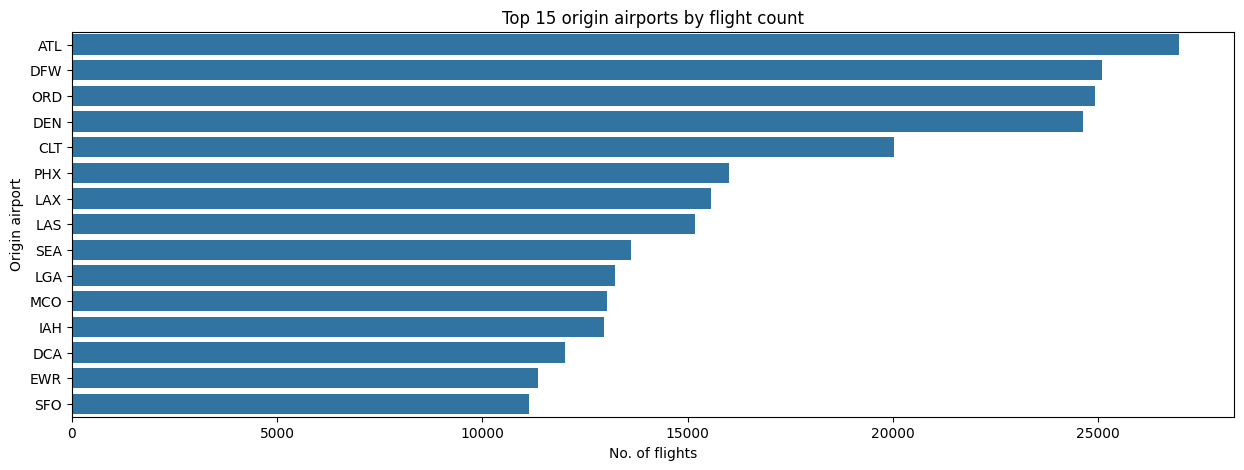

In [7]:
# Plot origin airport level counts
plt.figure(figsize=(15, 5))
level_counts=data_df['origin'].value_counts().head(15).index
sns.countplot(data=data_df, y='origin', order=level_counts)

plt.title('Top 15 origin airports by flight count')
plt.xlabel('No. of flights')
plt.ylabel('Origin airport')

# Ensure the directory exists
output_dir = config.STATIC_APP_ASSETS
# Join the filename to the directory path
file_path = os.path.join(output_dir, "origin_airports.png")
# Save the figure
plt.savefig(file_path, format="png", bbox_inches="tight")
print(f"Saving plot to: {file_path}")

plt.show()


### 2.3. Destination Airport 

Saving plot to: ./src/static/destination_airports.png


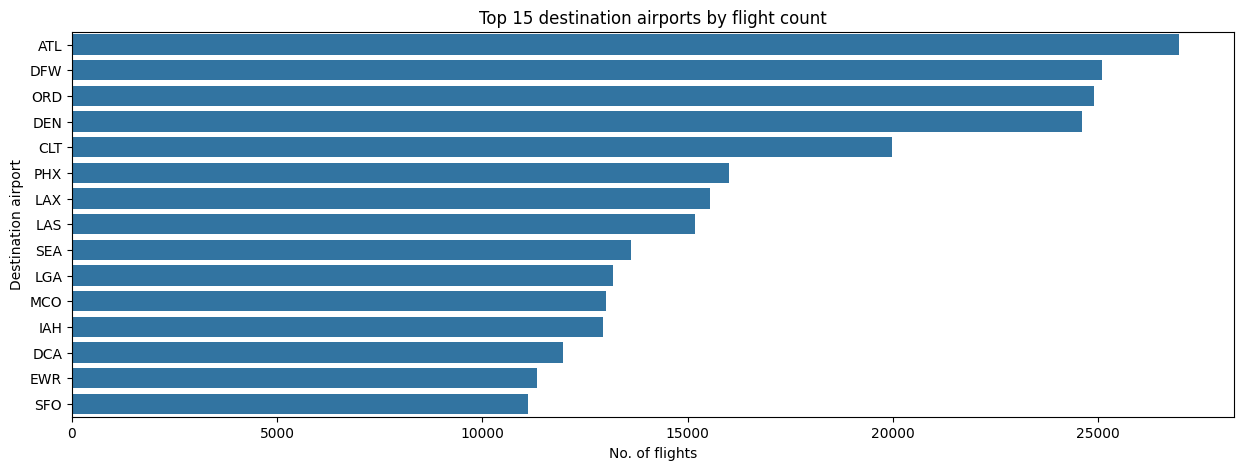

In [8]:
# Plot destination airport level counts
plt.figure(figsize=(15, 5))
level_counts=data_df['destination'].value_counts().head(15).index
sns.countplot(data=data_df, y='destination', order=level_counts)

plt.title('Top 15 destination airports by flight count')
plt.xlabel('No. of flights')
plt.ylabel('Destination airport')
# Ensure the directory exists
output_dir = config.STATIC_APP_ASSETS
# Join the filename to the directory path
file_path = os.path.join(output_dir, "destination_airports.png")
# Save the figure
plt.savefig(file_path, format="png", bbox_inches="tight")
print(f"Saving plot to: {file_path}")
plt.show()

### 2.4. Incident Feature 

In [9]:
data_df['incident'].value_counts()

incident
0    595162
1     14413
Name: count, dtype: int64

Saving plot to: ./src/static/incidents.png


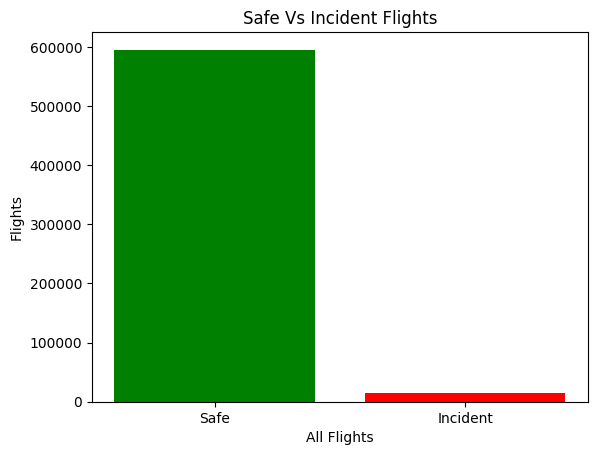

In [10]:
level_counts=data_df['incident'].value_counts()
new_labels = ['Safe', 'Incident']
plt.bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color=('green', 'red'))
plt.title('Safe Vs Incident Flights')
plt.xlabel('All Flights')
plt.xticks(range(len(level_counts)), new_labels)
plt.ylabel('Flights')
# Ensure the directory exists
output_dir = config.STATIC_APP_ASSETS
# Join the filename to the directory path
file_path = os.path.join(output_dir, "incidents.png")
# Save the figure
plt.savefig(file_path, format="png", bbox_inches="tight")
print(f"Saving plot to: {file_path}")
plt.show()


In [11]:
print(data_df.head())

  origin destination  departure_time tail_number  incident
0    CVG         LGA          1647.0      N914XJ         0
1    CVG         LGA          1719.0      N478PX         0
2    CVG         LGA          1656.0      N917XJ         0
3    CVG         LGA          1650.0      N914XJ         0
4    LGA         CVG          1328.0      N166PQ         0


### 2.5. Route Feature 

In [12]:
data_df['origin'] = data_df['origin'].str.strip().str.upper()
data_df['destination'] = data_df['destination'].str.strip().str.upper()

In [13]:
data_df['route'] = data_df['origin'] + '_' + data_df['destination']

print(data_df.head())

  origin destination  departure_time tail_number  incident    route
0    CVG         LGA          1647.0      N914XJ         0  CVG_LGA
1    CVG         LGA          1719.0      N478PX         0  CVG_LGA
2    CVG         LGA          1656.0      N917XJ         0  CVG_LGA
3    CVG         LGA          1650.0      N914XJ         0  CVG_LGA
4    LGA         CVG          1328.0      N166PQ         0  LGA_CVG


In [14]:
incident_df = data_df[data_df['incident'] == 1]
incident_df

,origin,destination,departure_time,tail_number,incident,route
595162,O69,OQ3,2200.0,N8037W,1,O69_OQ3
595163,OQ3,O70,2230.0,N15EX,1,OQ3_O70
595164,T20,AXH,2100.0,N579RM,1,T20_AXH
595165,PHX,PWA,400.0,N398J,1,PHX_PWA
595166,KFNL,KFNL,2215.0,N24965,1,KFNL_KFNL
...,...,...,...,...,...,...
609570,TRL,OCH,1430.0,N439FJ,1,TRL_OCH
609571,LHD,LHD,2000.0,N1718R,1,LHD_LHD
609572,PVB,PVB,1730.0,N568RD,1,PVB_PVB
609573,PABE,PVT,1830.0,N57617,1,PABE_PVT


Saving plot to: ./src/static/incident_routes.png


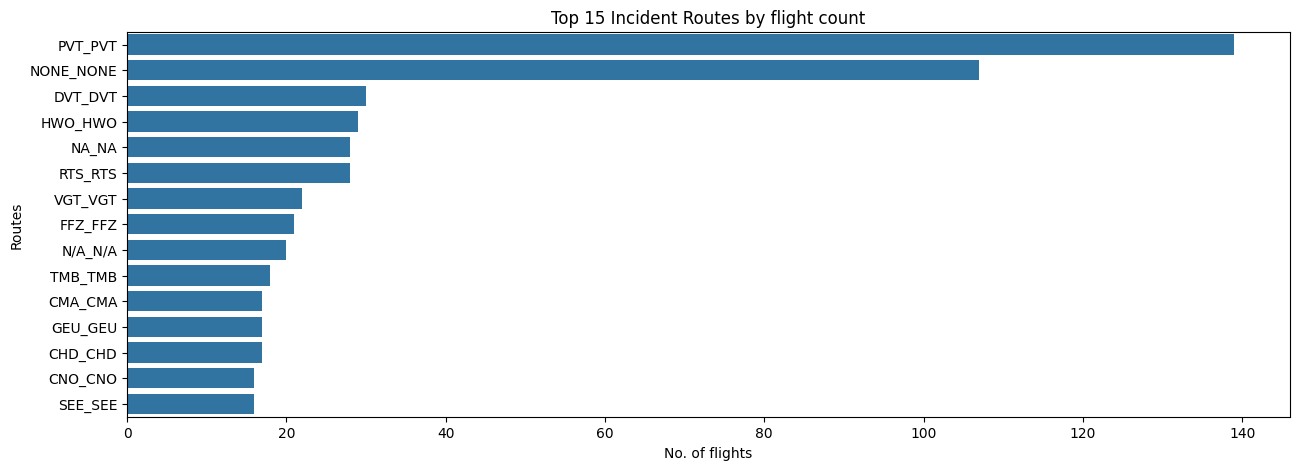

In [15]:
# Plot incident routes
plt.figure(figsize=(15, 5))
level_counts=incident_df['route'].value_counts().head(15).index
sns.countplot(data=incident_df, y='route', order=level_counts)

plt.title('Top 15 Incident Routes by flight count')
plt.xlabel('No. of flights')
plt.ylabel('Routes')
# Ensure the directory exists
output_dir = config.STATIC_APP_ASSETS
# Join the filename to the directory path
file_path = os.path.join(output_dir, "incident_routes.png")
# Save the figure
plt.savefig(file_path, format="png", bbox_inches="tight")
print(f"Saving plot to: {file_path}")
plt.show()

## 3. Encode departure time

In [16]:
cyclical_encoded_data_df = data_df.copy()

cyclical_encoded_data_df.head().T

,0,1,2,3,4
origin,CVG,CVG,CVG,CVG,LGA
destination,LGA,LGA,LGA,LGA,CVG
departure_time,1647.0,1719.0,1656.0,1650.0,1328.0
tail_number,N914XJ,N478PX,N917XJ,N914XJ,N166PQ
incident,0,0,0,0,0
route,CVG_LGA,CVG_LGA,CVG_LGA,CVG_LGA,LGA_CVG


In [17]:
# Function to convert HHMM format to minutes since midnight
def hhmm_to_minutes(hhmm):
    hhmm_int = int(hhmm)
    hours = hhmm // 100
    minutes = hhmm % 100
    return hours * 60 + minutes

# Add minutes since midnight column
cyclical_encoded_data_df['Time'] = cyclical_encoded_data_df['departure_time'].apply(hhmm_to_minutes)

# Add formatted time label for display
cyclical_encoded_data_df['time_label'] = cyclical_encoded_data_df['departure_time'].apply(lambda x: f"{int(x)//100:02d}:{int(x)%100:02d}")

# Apply cyclical encoding - add two new columns
cyclical_encoded_data_df['time_sin'] = np.sin(2 * np.pi * cyclical_encoded_data_df['Time'] / 1440)  # 1440 minutes in a day
cyclical_encoded_data_df['time_cos'] = np.cos(2 * np.pi * cyclical_encoded_data_df['Time'] / 1440)

# Display the DataFrame with the new cyclical encoding columns
print("DataFrame with cyclical time encoding:")
print(cyclical_encoded_data_df.head(3).round(4).T)


DataFrame with cyclical time encoding:
                      0        1        2
origin              CVG      CVG      CVG
destination         LGA      LGA      LGA
departure_time   1647.0   1719.0   1656.0
tail_number      N914XJ   N478PX   N917XJ
incident              0        0        0
route           CVG_LGA  CVG_LGA  CVG_LGA
Time             1007.0   1039.0   1016.0
time_label        16:47    17:19    16:56
time_sin        -0.9497   -0.984  -0.9613
time_cos        -0.3132  -0.1779  -0.2756


### 3.1. Visualization of cyclical encoding 
#### 3.1.1. Sine and cosine vale plot 

Saving plot to: ./src/static/cyclical_encoding.png


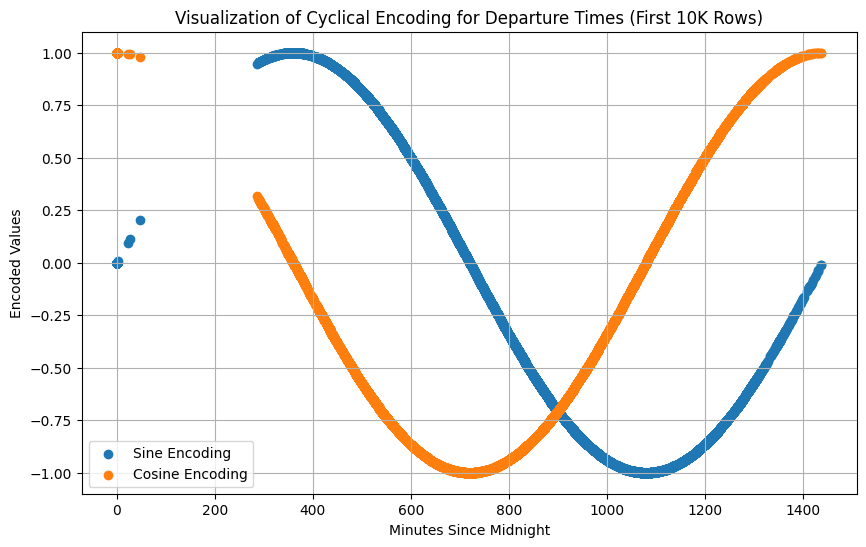

In [18]:
# Filter the DataFrame to only include the first 10K flights
filtered_data = cyclical_encoded_data_df.head(10000)

# Visualization of cyclical encoding
plt.figure(figsize=(10, 6))

# Plot sine and cosine values
plt.scatter(filtered_data['Time'], filtered_data['time_sin'], label='Sine Encoding', marker='o')
plt.scatter(filtered_data['Time'], filtered_data['time_cos'], label='Cosine Encoding', marker='o')

# Add labels, title, and legend
plt.title("Visualization of Cyclical Encoding for Departure Times (First 10K Rows)")
plt.xlabel("Minutes Since Midnight")
plt.ylabel("Encoded Values")
# Ensure the directory exists
output_dir = config.STATIC_APP_ASSETS
# Join the filename to the directory path
file_path = os.path.join(output_dir, "cyclical_encoding.png")
# Save the figure
plt.savefig(file_path, format="png", bbox_inches="tight")
print(f"Saving plot to: {file_path}")
plt.legend()
plt.grid()
plt.show()

#### 3.1.2. Circular Visualization 

Saving plot to: ./src/static/circle_time.png


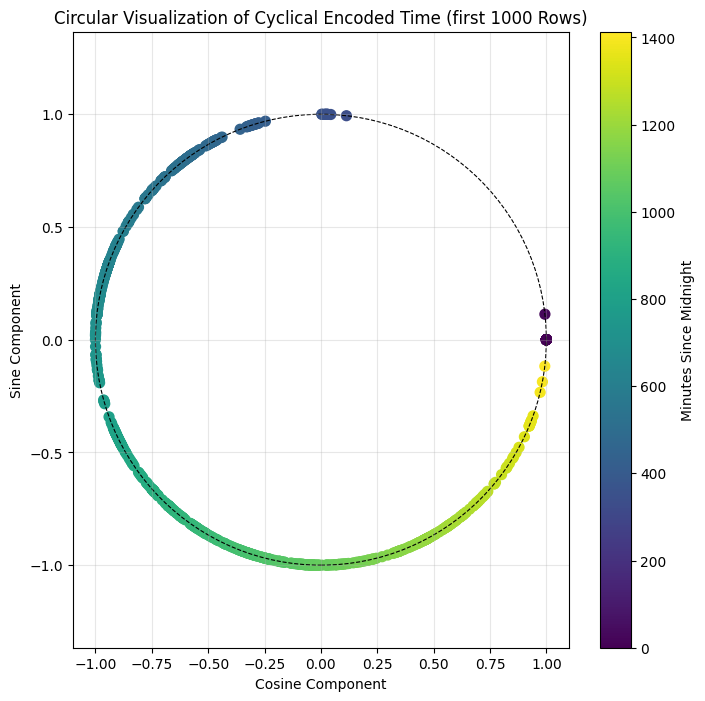

In [19]:
# Filter the DataFrame to only include the first 1000 flights
filtered_data = cyclical_encoded_data_df.head(1000)

# Circular Visualization
plt.figure(figsize=(8, 8))

# Plot the circular points
plt.scatter(filtered_data['time_cos'], filtered_data['time_sin'], c=filtered_data['Time'], cmap='viridis', s=50)

# Plot a circle for reference
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=0.8)
plt.gca().add_artist(circle)

# Set aspect ratio and labels
plt.gca().set_aspect('equal', adjustable='datalim')
plt.title("Circular Visualization of Cyclical Encoded Time (first 1000 Rows)")
plt.xlabel("Cosine Component")
plt.ylabel("Sine Component")
plt.grid(alpha=0.3)
plt.colorbar(label="Minutes Since Midnight")
# Ensure the directory exists
output_dir = config.STATIC_APP_ASSETS
# Join the filename to the directory path
file_path = os.path.join(output_dir, "circle_time.png")
# Save the figure
plt.savefig(file_path, format="png", bbox_inches="tight")
print(f"Saving plot to: {file_path}")
plt.show()

## 4. Clean up features

In [20]:
cyclical_encoded_data_df.head(5)

,origin,destination,departure_time,tail_number,incident,route,Time,time_label,time_sin,time_cos
0,CVG,LGA,1647.0,N914XJ,0,CVG_LGA,1007.0,16:47,-0.949699,-0.313164
1,CVG,LGA,1719.0,N478PX,0,CVG_LGA,1039.0,17:19,-0.984041,-0.177944
2,CVG,LGA,1656.0,N917XJ,0,CVG_LGA,1016.0,16:56,-0.961262,-0.275637
3,CVG,LGA,1650.0,N914XJ,0,CVG_LGA,1010.0,16:50,-0.953717,-0.300706
4,LGA,CVG,1328.0,N166PQ,0,LGA_CVG,808.0,13:28,-0.374607,-0.927184


In [21]:
cyclical_encoded_data_df.drop(columns=['origin','destination','departure_time','tail_number','Time', 'time_label'], inplace=True)
cyclical_encoded_data_df.head(5)

,incident,route,time_sin,time_cos
0,0,CVG_LGA,-0.949699,-0.313164
1,0,CVG_LGA,-0.984041,-0.177944
2,0,CVG_LGA,-0.961262,-0.275637
3,0,CVG_LGA,-0.953717,-0.300706
4,0,LGA_CVG,-0.374607,-0.927184


## 5. Encode Route 

In [22]:
# Frequency encoding for 'route'
route_frequency = cyclical_encoded_data_df['route'].value_counts()
cyclical_encoded_data_df['route_encoded'] = cyclical_encoded_data_df['route'].map(route_frequency)
cyclical_encoded_data_df.drop(columns=['route'], inplace=True)

# Display the updated dataset
print("DataFrame with frequency-encoded features:")
print(cyclical_encoded_data_df.head(5).T)

DataFrame with frequency-encoded features:
                        0           1           2           3           4
incident         0.000000    0.000000    0.000000    0.000000    0.000000
time_sin        -0.949699   -0.984041   -0.961262   -0.953717   -0.374607
time_cos        -0.313164   -0.177944   -0.275637   -0.300706   -0.927184
route_encoded  203.000000  203.000000  203.000000  203.000000  206.000000


In [23]:
data_df=cyclical_encoded_data_df.copy()
data_df.head(5).T

,0,1,2,3,4
incident,0.000000,0.000000,0.000000,0.000000,0.000000
time_sin,-0.949699,-0.984041,-0.961262,-0.953717,-0.374607
time_cos,-0.313164,-0.177944,-0.275637,-0.300706,-0.927184
route_encoded,203.000000,203.000000,203.000000,203.000000,206.000000


Saving plot to: ./src/static/cross-correlation-matrix.png


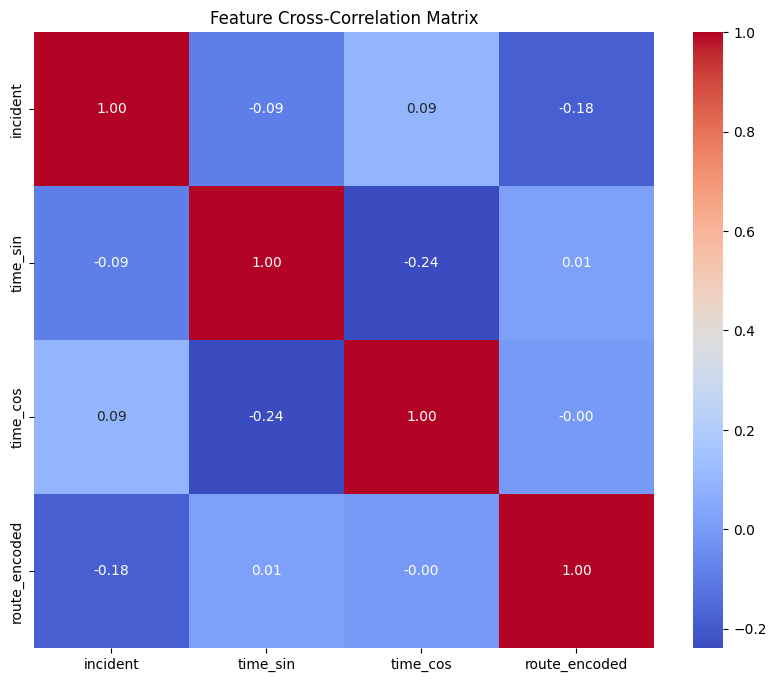

In [24]:
# cross correlation matrix
corr_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Cross-Correlation Matrix')
# Ensure the directory exists
output_dir = config.STATIC_APP_ASSETS
# Join the filename to the directory path
file_path = os.path.join(output_dir, "cross-correlation-matrix.png")
# Save the figure
plt.savefig(file_path, format="png", bbox_inches="tight")
print(f"Saving plot to: {file_path}")
plt.show()

## 6. Train-Test split

In [25]:
train_df, test_df=train_test_split(
    data_df,
    test_size=0.25, 
    random_state=315
)

In [26]:
train_df.head(5).T

,91449,453534,330702,505130,229956
incident,0.000000,0.000000,0.000000,0.000000,0.000000
time_sin,0.963630,-0.969231,0.771625,0.819152,-0.930418
time_cos,-0.267238,-0.246153,-0.636078,-0.573576,0.366501
route_encoded,385.000000,709.000000,31.000000,381.000000,10.000000


In [27]:
train_df.reset_index(drop=True, inplace=True)
train_df.head(5).T

,0,1,2,3,4
incident,0.000000,0.000000,0.000000,0.000000,0.000000
time_sin,0.963630,-0.969231,0.771625,0.819152,-0.930418
time_cos,-0.267238,-0.246153,-0.636078,-0.573576,0.366501
route_encoded,385.000000,709.000000,31.000000,381.000000,10.000000


In [28]:
test_df.reset_index(drop=True, inplace=True)
test_df.head(5).T

,0,1,2,3,4
incident,0.0,0.000000,0.000000,0.000000,0.000000
time_sin,0.0,-0.406737,-0.801254,-0.998392,-0.622515
time_cos,1.0,0.913545,0.598325,-0.056693,-0.782608
route_encoded,85.0,32.000000,421.000000,30.000000,553.000000


## 7. Save

In [29]:
Path(config.PROCESSED_DATA_DIRECTORY).mkdir(exist_ok=True)

data_df.to_csv(config.ENCODED_DATAFILE, index=False)
train_df.to_csv(config.TRAINING_DATAFILE, index=False)
test_df.to_csv(config.TESTING_DATAFILE, index=False)